# Libraries

In [2]:
from pathlib import Path
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

from metadata import ImageDataset, patient

In [3]:
notebook_path = Path().cwd()
repo_path = notebook_path.parent
print(f'The current directory is: {notebook_path}')

The current directory is: d:\VS_Projects\MISA_FINAL_PROJECT\notebooks


# Main

## Creating a metadata csv file

In [4]:
def sets_IDS(set_name:str):
    """Get paths and IDs of patient in different matched lists

    Args:
        set_name (str): Training, Validation or Test

    Returns:
        lists: folder, ID lists and ID int list
    """
        
    set_path = Path(repo_path / f'data/{set_name}_Set')
    # We get the subfolders name in each data folder
    folders_list = [f.relative_to(repo_path) for f in set_path.iterdir() if f.is_dir()]
    ID_list  = [(x.stem[-2:]) for x in folders_list] #Get patient number
    ID_int_list = [int(x) for x in ID_list]
    
    df = pd.DataFrame( #create dataframe with relevant information
    {
        'ID' : ID_list,
        'ID_int': ID_int_list,
        'folder_path': folders_list,
        'set_name': f'{set_name}'
    }
)
    df.sort_values(by=['ID_int'], inplace=True) #sort by ID_int
    #remove ID_int column
    df.drop(columns=['ID_int'], inplace=True)
    
    return df.reset_index(drop=True)

First, we create the csv file with the metadata of the dataset. We will use this file every time we need to access data for each patient.

In [5]:
#Create dataframe with all the images information
info_images = pd.concat([sets_IDS('Training'), sets_IDS('Validation'), sets_IDS('Test')]).reset_index(drop=True)
#save as csv file
info_images.to_csv(repo_path / 'data/info_images.csv', index=False)
info_images

,ID,folder_path,set_name
0,01,data\Training_Set\IBSR_01,Training
1,03,data\Training_Set\IBSR_03,Training
2,04,data\Training_Set\IBSR_04,Training
3,05,data\Training_Set\IBSR_05,Training
4,06,data\Training_Set\IBSR_06,Training
5,07,data\Training_Set\IBSR_07,Training
6,08,data\Training_Set\IBSR_08,Training
7,09,data\Training_Set\IBSR_09,Training
8,16,data\Training_Set\IBSR_16,Training
9,18,data\Training_Set\IBSR_18,Training


## How to use ImageDataset and patient classes?

In [6]:
#instantiate dataset, specify set name
im_data = ImageDataset('Training')
#check length
print(f'len: {im_data.len}')
#get all ids (useful to iterate over all adataset)
print(f'all ids: {im_data.IDs}')
#get list of all images paths for training
print(f'images paths: {im_data.im_paths()}')
#same for the labels
print(f'images paths: {im_data.labels_paths()}')

len: 10
all ids: ['01', '03', '04', '05', '06', '07', '08', '09', '16', '18']
images paths: ['data\\Training_Set\\IBSR_01\\IBSR_01.nii.gz', 'data\\Training_Set\\IBSR_03\\IBSR_03.nii.gz', 'data\\Training_Set\\IBSR_04\\IBSR_04.nii.gz', 'data\\Training_Set\\IBSR_05\\IBSR_05.nii.gz', 'data\\Training_Set\\IBSR_06\\IBSR_06.nii.gz', 'data\\Training_Set\\IBSR_07\\IBSR_07.nii.gz', 'data\\Training_Set\\IBSR_08\\IBSR_08.nii.gz', 'data\\Training_Set\\IBSR_09\\IBSR_09.nii.gz', 'data\\Training_Set\\IBSR_16\\IBSR_16.nii.gz', 'data\\Training_Set\\IBSR_18\\IBSR_18.nii.gz']
images paths: ['data\\Training_Set\\IBSR_01\\IBSR_01_seg.nii.gz', 'data\\Training_Set\\IBSR_03\\IBSR_03_seg.nii.gz', 'data\\Training_Set\\IBSR_04\\IBSR_04_seg.nii.gz', 'data\\Training_Set\\IBSR_05\\IBSR_05_seg.nii.gz', 'data\\Training_Set\\IBSR_06\\IBSR_06_seg.nii.gz', 'data\\Training_Set\\IBSR_07\\IBSR_07_seg.nii.gz', 'data\\Training_Set\\IBSR_08\\IBSR_08_seg.nii.gz', 'data\\Training_Set\\IBSR_09\\IBSR_09_seg.nii.gz', 'data\\Trainin

selected id: 01


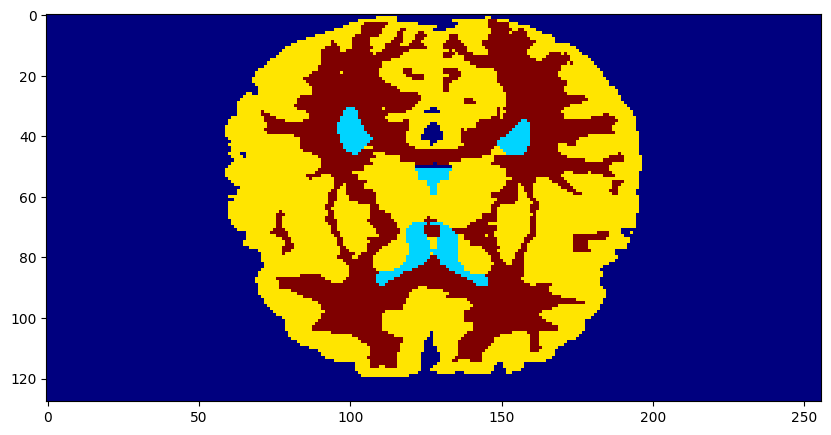

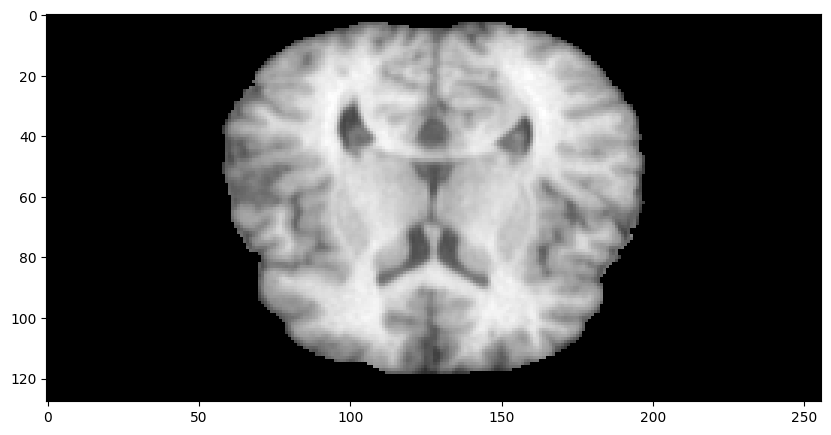

In [7]:
#select one id of patient to check
id = im_data.IDs[0]
print(f'selected id: {id}')
#istantiate patient object using the id and the previous ImageDataset object
pat = patient(id, im_data)
#You can print the image or the labels
pat.show('labels')
pat.show('im')

In [8]:
#you can get the sitk or numpy image
pat.im(format='sitk')
pat.im(format='np')
#the same for the labels
pat.labels(format='sitk')
pat.labels(format='np')

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 